## Education Analysis

1. Citywide Attendance Data
- What is the attendance percentage and chronically absent percentage over the years?

- What is the attendance percentage and chronically absent percentage by grade over the years?

- Compare the attendance percantage to the chronically absent percentage

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
edu_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv")

edu_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5
...,...,...,...,...,...,...,...,...,...,...
53602,12,All Students,2018-19,62398,10686,51712,82.9,363,200,55.1
53603,12,All Students,2019-20,39800,6585,33215,83.5,352,194,55.1
53604,12,All Students,2020-21,68770,15327,53443,77.7,398,224,56.3
53605,12,All Students,2021-22,60634,16098,44536,73.5,355,263,74.1


In [68]:
edu_df.describe()

,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


In [69]:
edu_df.shape

(53607, 10)

In [70]:
edu_df.isna().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

In [71]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

In [86]:
# Change objects into integers
columns = [
    "# Days Absent",
    "# Days Present",
    "% Attendance",
    "# Contributing 10+ Total Days and 1+ Pres Day",
    "# Chronically Absent",
    "% Chronically Absent"
]

for col in columns:
    edu_df[col] = pd.to_numeric(edu_df[col], errors="coerce")    

What is the attendance percentage over the years?

In [87]:
# Select only all grades
attend_df = edu_df[(edu_df["Grade"] ==  "All Grades")]

attend_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278.0,28609.0,92.6,192.0,47.0,24.5
1,All Grades,All Students,2019-20,21101,1500.0,19601.0,92.9,204.0,58.0,28.4
2,All Grades,All Students,2020-21,32686,3931.0,28755.0,88.0,199.0,84.0,42.2
3,All Grades,All Students,2021-22,31663,4751.0,26912.0,85.0,190.0,113.0,59.5
4,All Grades,All Students,2022-23,32663,4159.0,28504.0,87.3,206.0,104.0,50.5
...,...,...,...,...,...,...,...,...,...,...
53577,All Grades,All Students,2018-19,112306,18753.0,93553.0,83.3,666.0,373.0,56.0
53578,All Grades,All Students,2019-20,73228,12417.0,60811.0,83.0,652.0,354.0,54.3
53579,All Grades,All Students,2020-21,112857,24696.0,88161.0,78.1,655.0,365.0,55.7
53580,All Grades,All Students,2021-22,103648,28690.0,74958.0,72.3,609.0,443.0,72.7


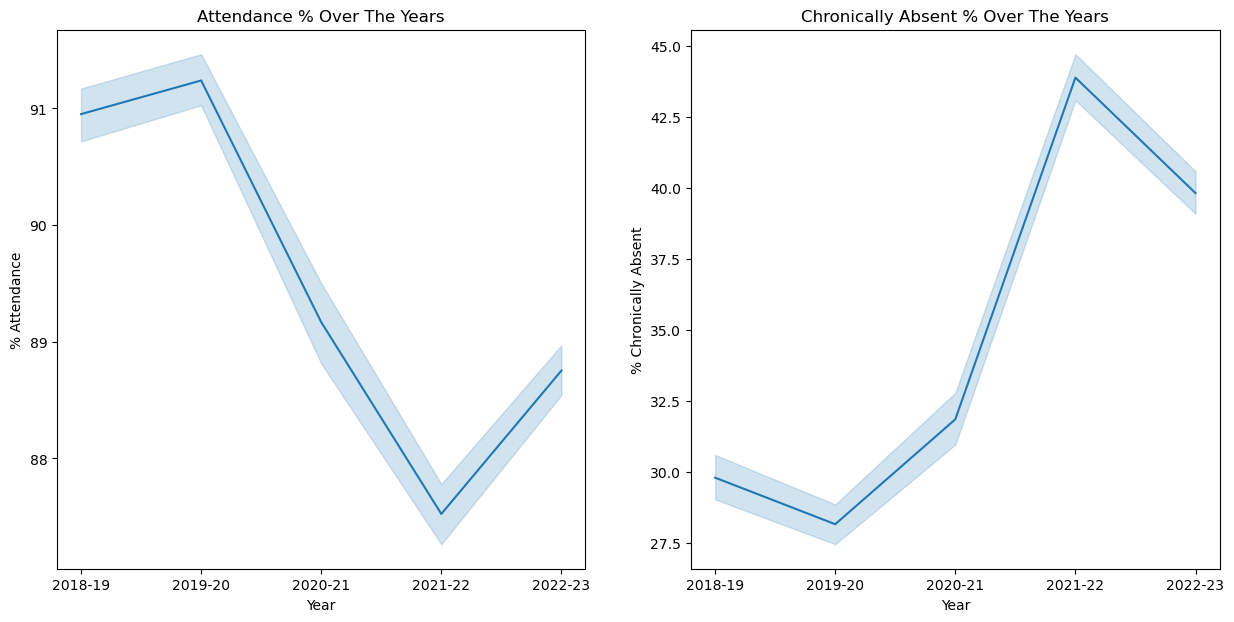

In [107]:
# Plot graph
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.lineplot(data=attend_df, x="Year", y="% Attendance")
plt.title("Attendance % Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=attend_df, x="Year", y="% Chronically Absent")
plt.title("Chronically Absent % Over The Years")


plt.show()

The attendance rate of students tremendously dropped in 2019 from 93% to 86% in 2021. The chronically absent rate had an inverse effect from the attendance rate where it steadily increased from 2019 to 2021.

What is the attendance percentage and chronically absent percentage by grade over the years?

In [75]:
# Filter out only all grades 
grade_df = edu_df[(edu_df["Grade"] !=  "All Grades")]

grade_df

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
5,PK in K-12 Schools,All Students,2018-19,2104,245.0,1859.0,88.4,15.0,7.0,46.7
6,PK in K-12 Schools,All Students,2019-20,1490,198.0,1292.0,86.7,15.0,10.0,66.7
7,PK in K-12 Schools,All Students,2020-21,2830,467.0,2363.0,83.5,18.0,10.0,55.6
8,PK in K-12 Schools,All Students,2021-22,2812,598.0,2214.0,78.7,18.0,12.0,66.7
9,PK in K-12 Schools,All Students,2022-23,2136,336.0,1800.0,84.3,13.0,10.0,76.9
...,...,...,...,...,...,...,...,...,...,...
53602,12,All Students,2018-19,62398,10686.0,51712.0,82.9,363.0,200.0,55.1
53603,12,All Students,2019-20,39800,6585.0,33215.0,83.5,352.0,194.0,55.1
53604,12,All Students,2020-21,68770,15327.0,53443.0,77.7,398.0,224.0,56.3
53605,12,All Students,2021-22,60634,16098.0,44536.0,73.5,355.0,263.0,74.1


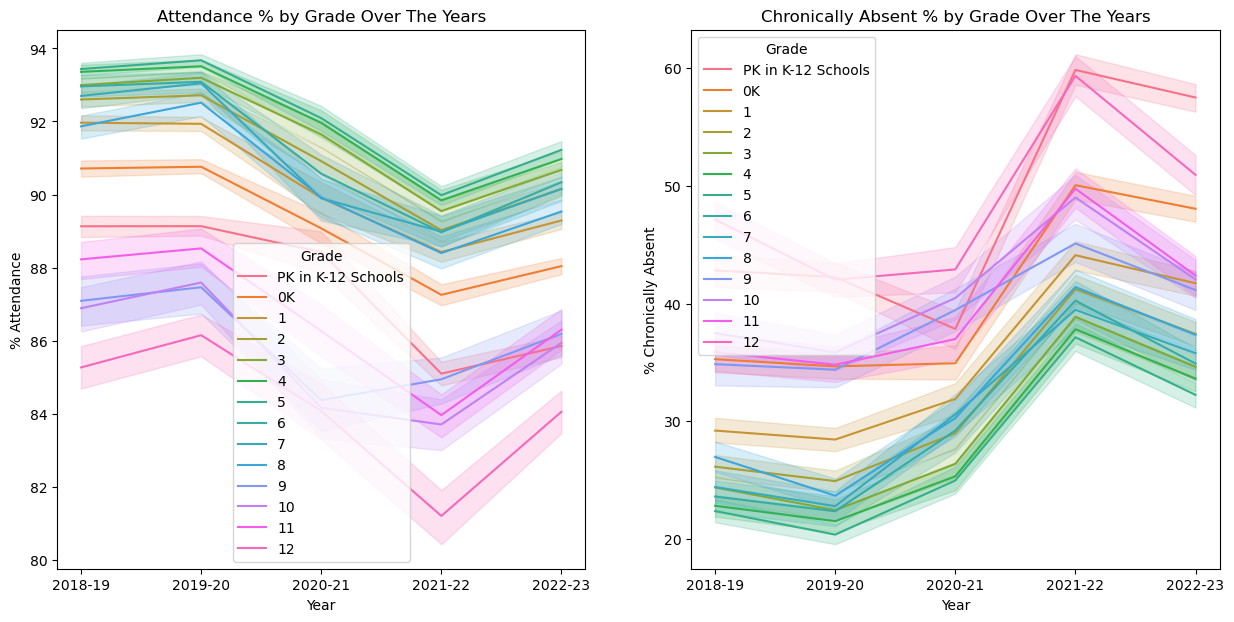

In [106]:
# Plot graoh
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.lineplot(data=grade_df, x="Year", y="% Attendance", hue="Grade")
plt.title("Attendance % by Grade Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=grade_df, x="Year", y="% Chronically Absent", hue="Grade")
plt.title("Chronically Absent % by Grade Over The Years")
          
plt.show()

Every single grade has similar attendance rates and they all suffered a drop in 2019. Additionally, every single grade except one chronically absent rate is similar and increased steadily from 2019.

Compare attendance percantage to chronically absent percentage 

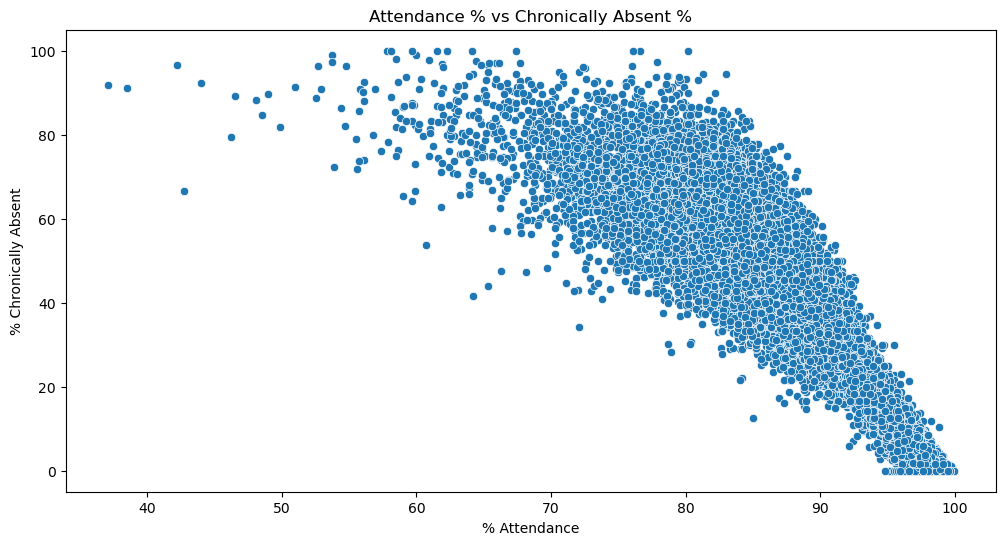

In [98]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.scatterplot(data=edu_df, x="% Attendance", y="% Chronically Absent")
plt.title('Attendance % vs Chronically Absent %')
plt.show()

When Attendance % is low 40%–60%, the Chronically Absent % tends to between 60%–80%. When Attendance % is above 90%, the Chronically Absent % is near 0%. There's a downward slope that becomes closer together as attendance increases which means schools with high attendance rates have fewer chronically absent students.